**1. 드라이브 마운트**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. 데이터 불러오기**

In [ ]:
import pandas as pd
import csv
para = pd.read_excel('/content/drive/MyDrive/Data/gisaengchung.xlsx')

In [ ]:
para.head()
para.info()
para.isnull().any()
para.count()

**3. 통계량 확인**

In [ ]:
# https://colab.research.google.com/drive/1BAoYC5pOOl0B4SQ29qKPr6m96EelG-A2?usp=share_link#scrollTo=6MvU2NJOmeqq

**4. 데이터 전처리**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('all')
nltk.download('popular')

In [ ]:
def preprocessing(text):
    # 단어 토큰화
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)] 
   
    # 불용어 제거
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]
    
    # 3 단어 이내 단어 제거
    tokens = [word for word in tokens if len(word) >= 3]
       
    # 소문자화
    tokens = [word.lower() for word in tokens]
    
    # 표제어 추출
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]

    preprocessed_text= ' '.join(tokens)
    return preprocessed_text

In [ ]:
para['review_pre'] = para['contents'].apply(lambda x: preprocessing(x))

In [ ]:
para.head()

**5. 워드클라우드 작성**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

(-0.5, 599.5, 599.5, -0.5)

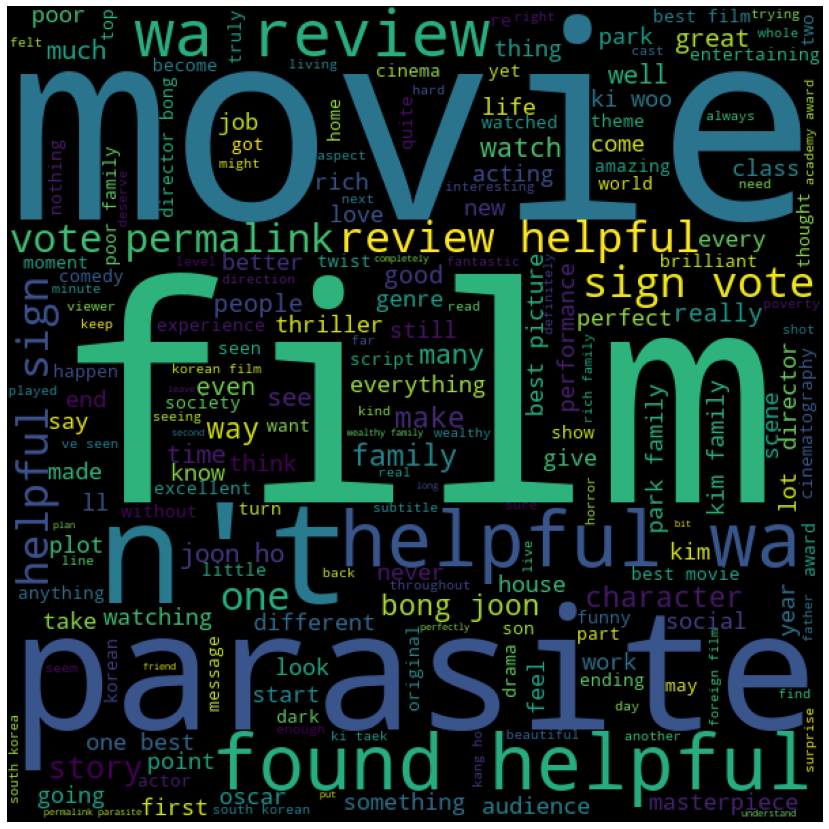

In [ ]:
cloud = WordCloud(width=600, height=600).generate(" ".join(para['review_pre']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')